Case Study 3: Build a spam classifier using naive Bayes and clustering. You will have to create your own dataset from the input messages. Be sure to document how you created your dataset.

In [142]:
# Clustering and Naive bayes 
# Predict Spam or Not Spam 
# Determine the threshold 
# Naive Bayes as the email filter
# you have to create your own dataset from the data given 
# Accuracy will be close to 100% 
# TFIDF or Bagging can be used either will work well 

# zip file has spam messages
# theres non spam and spam 
# if its spam if its ham
# strictly binary two class classification problem doesnt matter if its hard
# text files
# text apart, cut the header off , you can use the email package 
# if its in the ham folder - assign a zero 
# shuffle when you create your splits
# spam - assign a 1 
# you just use a giant for loop and thats it - to walk through the files 
# computer makes short work of it 


In [241]:
# Start using the email package to get the simpler ones, but there are more you have to delve into. 


# 1. Load the data
# but we really want the email message itself we dont want the header. 
# based off the text of the email classify this. 
# 
import os
import email 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score


import numpy as np



In [242]:
import os

# Set the directory path
directory = "/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_study3/"

# Change the current working directory
os.chdir(directory)
os.listdir("/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_study3/SpamAssassinMessages/")

['spam', 'hard_ham', 'spam_2', 'easy_ham', 'easy_ham_2']

In [ ]:
# # join email and file together 
# # you need to parse the HTML email and get to it
# # encoding had to be set
# # introduce some error handling with try and except 
# # DERP is a placeholder for the error handling
# # counting different codec types
# # Counter a fast way to count things - boiler plate 
# # 


from collections import Counter
types = Counter()
targets=[]
text=[]
for root,dirs,files in os.walk("."):
    for file in files:
        if "ipynb" in file:
            pass
        else:
            with open(os.path.join(root,file), "r",encoding='latin-1') as f:
                try:
                    tmp = email.message_from_file(f)
                    type_ = tmp.get_content_type()
                    if type_== 'text/html':
                        print("Need to parse HTML")
                    types[type_]+=1
                    tmp = tmp.get_payload().replace("\n"," ")
                except:
                    pass
                    tmp = "DERP"
                text.append(tmp)
            if "spam" in root:
                targets.append(1)
            else:
                targets.append(0)

    

In [239]:
print(root, file, types)

./SpamAssassinMessages/easy_ham_2 00747.352d424267d36975a7b40b85ffd0885e Counter({'text/plain': 7416, 'text/html': 1193, 'multipart/alternative': 326, 'multipart/signed': 180, 'multipart/mixed': 179, 'multipart/related': 56, 'multipart/report': 5, 'text/plain charset=us-ascii': 1})


## Now we go through each type 
# Multipart - we have to find the email portion to turn into text 

In [ ]:

# for root,dirs,files in os.walk("."):
#     for file in files:
#         if "ipynb" in file:
#             pass
#         else:
#             with open(os.path.join(root,file), "r",encoding='latin-1') as f:
#                 try:
#                     tmp = email.message_from_file(f)
#                     type_ = tmp.get_content_type()
#                     if "multipart" in type_:
#                         break
#                 except:
#                     pass


In [236]:
# type_ # great now we have grabbed the multipart/alternative, you will have to repeat this process till you worked your way through all the multiparts. 

'multipart/alternative'

In [201]:
# for i in tmp.get_payload():
#     print(i.get_content_type())
#     # they are already email messages


text/plain
text/html


In [ ]:
# # now go through and figure out which one of these is the text
# for i in tmp.get_payload():
#     print(i.get_content_type()) 
#     if i.get_content_type() == 'text/plain':
#         print(i.get_payload())
#         break
    
# # we can see that first text/plain you are going to get a return 
# # at the end you have to start making assumptions that where the text is going two or three deep. 

# # for html parser use beuatful soup - a web browser - you have to figure out where the text is at within the html code. 
# # html_parser or html parser 


In [211]:
# 9453 targets 
# len(targets)
# text

9355

In [205]:
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np
# cv = CountVectorizer()
# out=cv.fit_transform(text)

In [206]:
# out # vocab around 90,000 you can set word count to 5000, or you can make it into a regular matrix, but thats it this is your text transform 

<9355x125683 sparse matrix of type '<class 'numpy.int64'>'
	with 1493531 stored elements in Compressed Sparse Row format>

In [209]:
# import numpy as np
# x = np.array(out[0]) # you can go through this and look at the first entry that word count vectorizer has been done behind these seens. now your readyt to go your modeling. 
x

array(<1x125683 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>, dtype=object)

----------------

In [243]:
import os
import email
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Initialize counters and lists
types = Counter()
targets = []
text_data = []

# Function to extract text from email parts
def extract_text_from_email(msg):
    text_parts = []
    if msg.is_multipart():
        for part in msg.get_payload():
            text_parts.extend(extract_text_from_email(part))
    else:
        content_type = msg.get_content_type()
        if content_type == 'text/plain':
            text_parts.append(msg.get_payload(decode=True).decode('latin-1'))
        elif content_type == 'text/html':
            html_content = msg.get_payload(decode=True).decode('latin-1')
            soup = BeautifulSoup(html_content, 'html.parser')
            text_parts.append(soup.get_text())
    return text_parts


In [244]:
# Walk through the directory and parse files
for root, dirs, files in os.walk("."):
    for file in files:
        if "ipynb" in file:
            continue
        try:
            with open(os.path.join(root, file), "r", encoding='latin-1') as f:
                msg = email.message_from_file(f)
                type_ = msg.get_content_type()
                types[type_] += 1
                text_parts = extract_text_from_email(msg)
                combined_text = ' '.join(text_parts).replace("\n", " ")
                text_data.append(combined_text)
                if "spam" in root:
                    targets.append(1)
                else:
                    targets.append(0)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
            text_data.append("DERP")
            targets.append(0)

# Ensure the combined text length is 9400 characters
processed_text_data = []
for text in text_data:
    if len(text) > 9400:
        processed_text_data.append(text[:9400])
    else:
        processed_text_data.append(text.ljust(9400))

# Perform CountVectorizer on the collected text data
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(processed_text_data)

# Print the features
print(X_features.toarray())
print(vectorizer.get_feature_names_out())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '0000' ... 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿò'
 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿô'
 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó']


In [245]:
len(targets)

9356

In [256]:
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt
import seaborn as sns

# Train and evaluate the Multinomial Naive Bayes model using cross-validation
model = MultinomialNB(alpha=1.0)
cv_scores = cross_val_score(model, X_features, targets, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")



Cross-validation scores: [0.90972222 0.98824158 0.98770711 0.99358632 0.98931053]
Mean cross-validation score: 0.9737135518736266


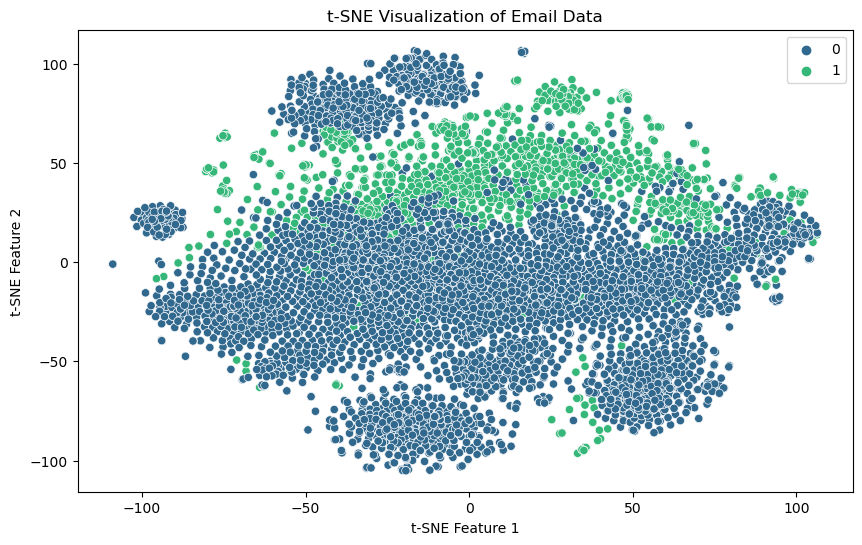


Sample parsed email content:

Target: 0
Content:
   Bud1          	                                                         A s s a s s                                                                                                                                                                                                                                                                                                                                                                                                                ...

Target: 0
Content:
PK    ! ç!]p  ×  [Content_Types].xml ¢(                                                                                                                                                                                                                                                                                                                                                                                             

In [253]:

from sklearn.manifold import TSNE

# Reduce dimensionality using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_features.toarray())

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=targets, palette='viridis')
plt.title('t-SNE Visualization of Email Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

# Additional logging for verification
print("\nSample parsed email content:")
for i, (t, txt) in enumerate(zip(targets, processed_text_data)):
    if i < 5:  # Print the first 5 samples for inspection
        print(f"\nTarget: {t}")
        print(f"Content:\n{txt[:500]}...")  # Print the first 500 characters of the text
    else:
        break

# Print the counter to verify email types
print("\nCounter of email types:")
print(types)

In [233]:
# import os
# import email
# from bs4 import BeautifulSoup
# from collections import Counter
# from sklearn.feature_extraction.text import CountVectorizer

# # Initialize counters and lists
# types = Counter()
# targets = []
# text_data = []

# # Function to extract text from email parts
# def extract_text_from_email(msg):
#     text_parts = []
#     if msg.is_multipart():
#         for part in msg.get_payload():
#             text_parts.extend(extract_text_from_email(part))
#     else:
#         content_type = msg.get_content_type()
#         if content_type == 'text/plain':
#             text_parts.append(msg.get_payload(decode=True).decode('latin-1'))
#         elif content_type == 'text/html':
#             html_content = msg.get_payload(decode=True).decode('latin-1')
#             soup = BeautifulSoup(html_content, 'html.parser')
#             text_parts.append(soup.get_text())
#     return text_parts

# # Walk through the directory and parse files
# for root, dirs, files in os.walk("."):
#     for file in files:
#         if "ipynb" in file:
#             continue
#         try:
#             with open(os.path.join(root, file), "r", encoding='latin-1') as f:
#                 msg = email.message_from_file(f)
#                 type_ = msg.get_content_type()
#                 types[type_] += 1
#                 text_parts = extract_text_from_email(msg)
#                 combined_text = ' '.join(text_parts).replace("\n", " ")
#                 text_data.append(combined_text)
#                 if "spam" in root:
#                     targets.append(1)
#                 else:
#                     targets.append(0)
#         except Exception as e:
#             print(f"Error processing file {file}: {e}")
#             text_data.append("DERP")
#             targets.append(0)

# # Ensure the combined text length is 9400 characters
# processed_text_data = []
# for text in text_data:
#     if len(text) > 9400:
#         processed_text_data.append(text[:9400])
#     else:
#         processed_text_data.append(text.ljust(9400))

# # Perform CountVectorizer on the collected text data
# vectorizer = CountVectorizer()
# X_features = vectorizer.fit_transform(processed_text_data)

# # Print the feature array and feature names
# print(X_features.toarray())
# print(vectorizer.get_feature_names_out())

# # Additional logging for verification
# print("\nSample parsed email content:")
# for i, (t, txt) in enumerate(zip(targets, processed_text_data)):
#     if i < 5:  # Print the first 5 samples for inspection
#         print(f"\nTarget: {t}")
#         print(f"Content:\n{txt[:500]}...")  # Print the first 500 characters of the text
#     else:
#         break

# # Print the counter to verify email types
# print("\nCounter of email types:")
# print(types)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '0000' ... 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿò'
 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿô'
 'ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó']

Sample parsed email content:

Target: 0
Content:
   Bud1          	                                                         A s s a s s                                                                                                                                                                                                                                                                                                                                                                                                                ...

Target: 0
Content:
PK    ! ç!]p  ×  [Content_Types].xml ¢(                                                                                                                

In [234]:
len(targets)

9356

In [221]:
len(targets)

1306

In [218]:
# from collections import Counter
# from bs4 import BeautifulSoup
# import email
# import logging

# types = Counter()
# targets = []
# text = []
# logging.basicConfig(filename='errors.log', level=logging.ERROR)


# def extract_text(part):
#     text_type = part.get_content_type()
#     if text_type is None:
#         return
#     if text_type == 'text/plain':
#         text.append(part.get_payload(decode=True).replace("\n", " "))
#     elif text_type == 'text/html':
#         soup = BeautifulSoup(part.get_payload(decode=True), 'html.parser')
#         text.append(soup.get_text(separator='\n'))
#     else:
#         logging.debug(f"Unsupported content type: {text_type}")


# def process_email(message):
#     type_ = message.get_content_type()
#     types[type_] += 1
#     if message.is_multipart():
#         for part in message.walk():
#             extract_text(part)
#     else:
#         extract_text(message)

#     # Check for target folder after processing
#     if "spam" in message.get('Delivery-Path', ''):  # Use Delivery-Path for deeper nesting
#         targets.append(1)
#     else:
#         targets.append(0)


# for root, dirs, files in os.walk("."):
#     for file in files:
#         if "ipynb" in file:
#             pass
#         else:
#             try:
#                 with open(os.path.join(root, file), "r", encoding='latin-1') as f:
#                     message = email.message_from_file(f)
#                     process_email(message)
#             except Exception as e:
#                 logging.error(f"Error processing file {file}: {e}")

# # Now you can use text and targets for further processing (e.g., CountVectorizer)


In [219]:
len(targets)

1306

In [216]:
# from collections import Counter
# from bs4 import BeautifulSoup
# import email
# import logging

# types = Counter()
# targets = []
# text = []
# logging.basicConfig(filename='errors.log', level=logging.ERROR)


# def extract_text(part):
#     text_type = part.get_content_type()
#     if text_type is None:
#         return
#     if text_type == 'text/plain':
#         text.append(part.get_payload(decode=True).replace("\n", " "))
#     elif text_type == 'text/html':
#         soup = BeautifulSoup(part.get_payload(decode=True), 'html.parser')
#         text.append(soup.get_text(separator='\n'))
#     else:
#         logging.debug(f"Unsupported content type: {text_type}")


# for root, dirs, files in os.walk("."):
#     for file in files:
#         if "ipynb" in file:
#             pass
#         else:
#             try:
#                 with open(os.path.join(root, file), "r", encoding='latin-1') as f:
#                     tmp = email.message_from_file(f)
#                     type_ = tmp.get_content_type()
#                     types[type_] += 1

#                     # Extract text from all parts
#                     for part in tmp.walk():
#                         extract_text(part)

#                 if "spam" in root:
#                     targets.append(1)
#                 else:
#                     targets.append(0)
#             except Exception as e:
#                 logging.error(f"Error processing file {file}: {e}")

# Now you can use text and targets for further processing (e.g., CountVectorizer)

In [213]:
# from collections import Counter
# from bs4 import BeautifulSoup
# import email
# import logging

# types = Counter()
# targets = []
# text = []
# logging.basicConfig(filename='errors.log', level=logging.ERROR)


# def extract_text(part):
#     if part.is_multipart():
#         for subpart in part.walk():
#             if subpart.is_multipart():
#                 continue
#             text_type = subpart.get_content_type()
#             if text_type == 'text/plain':
#                 text.append(subpart.get_payload(decode=True).replace("\n", " "))
#             elif text_type == 'text/html':
#                 soup = BeautifulSoup(subpart.get_payload(decode=True), 'html.parser')
#                 text.append(soup.get_text(separator='\n'))
#             else:
#                 logging.debug(f"Unsupported content type in subpart: {text_type}")
#     else:
#         text_type = part.get_content_type()
#         if text_type == 'text/plain':
#             text.append(part.get_payload(decode=True).replace("\n", " "))
#         elif text_type == 'text/html':
#             soup = BeautifulSoup(part.get_payload(decode=True), 'html.parser')
#             text.append(soup.get_text(separator='\n'))
#         else:
#             logging.debug(f"Unsupported content type in part: {text_type}")


# for root, dirs, files in os.walk("."):
#     for file in files:
#         if "ipynb" in file:
#             pass
#         else:
#             try:
#                 with open(os.path.join(root, file), "r", encoding='latin-1') as f:
#                     tmp = email.message_from_file(f)
#                     type_ = tmp.get_content_type()
#                     types[type_] += 1
#                     extract_text(tmp)  # Call the new function to handle parts

#                 if "spam" in root:
#                     targets.append(1)
#                 else:
#                     targets.append(0)
#             except Exception as e:
#                 logging.error(f"Error processing file {file}: {e}")

In [217]:
len(targets)

1306

In [ ]:
# we
# text - you can just use the text 
# you can use text html - this can use beautiful soup to parse the html - you have fix the html as well. 
# the multi-part - payload is an email message, go down that chain till you get text back, its a recursive function -- you can use a recursive function to get the text back. do this programatically.
# code - encoding latin-1 -- has some extra characters wtih accents 


In [106]:
# recursion to find all the multipart messages 
# find one of the multipart messages
# # for root, dirs, files in os.walk("Case_study3/SpamAssassinMessages/"): 
# for root, dirs, files in os.walk("../Case_study3/SpamAssassinMessages/"): 
#     for file in files: 
#         if 'ipynb' in files: 
#             pass 
#     else: 
#         with open(os.path.join(root, file), "r", encoding='latin-1') as f: 
#             try:
#                 tmp = email.message_from_file(f)
#                 type_= tmp.get_content_type()
#                 if 'multipart' in type_: 
#                     # print(tmp.get_payload())
#                     break    
#             except:
                # pass


FileNotFoundError: [Errno 2] No such file or directory: '../Case_study3/SpamAssassinMessages/Week5.ipynb'

In [94]:
type_
tmp

In [93]:
for i in tmp.get_payload():
    print(i.get_content_type())
    

AttributeError: 'str' object has no attribute 'get_content_type'

In [ ]:
def factorial(N):
    total = N
    if N == 1:
        return total
    else: 
        return total * factorial(N-1) 

In [ ]:
# targets
# and our text 
# nice thing about naive bayes, feature extraction sklearn - both your counter vectorizer and tdidf vectorizer - you can use the text directly. -- clean it up and return all the counts, return a sparse matrix, a set of ones an dzeros and it will tell you your word counts. 
#text - trun into a number and then you can use it in the naive bayes classifier- 
# count vectorizer we use lowercase, tokenzie by space, ngrams- word combos, you can analyze by syllable word, does all the heavy lfiting for you. 
# or you could use tfidf - this starts to normalize, certain words are important, words that occur in those emails, looks at words that occur semi frequently, normalize the data (we, the, etc) normalize by inverse document frequency-  look for flagged words rare words, by normalizing between different classes, however for this case you will be pushing higher accuracy, you would see a slight boost in accuracy. 
# then you go to the naive bayes: you get to figure out which one will work, so use categoricalNB - smoothing vectorizer is in there- this helps smooth out the zeroes indeterminant fractions, infintieis from popping up better for smaller parameter - but naive bayes doesnt have hyperparemters to tune really. 
# get clasess
# get teh features
# get the prediction - tells you class
# log probability
# proabbility - chance this is a spam message, we can play with that proabbility and play with that threshold. 
# arg_max - gives you the index of the highest probability 
# predict_proba - gives you the probability of each class - the raw data 
# you want 95% spam anything less use predict proba
# you can get these CV predict_proba this will help you vary the threshold back and forth. 
# gaussian naive bayes when you have continous variables - you can use multinomialNB - you can use the count vectorizer, you can use the tfidf vectorizer
# USE MULTONIMIALNB For your model 


In [ ]:
# for i in text: 
#     print(len(i))

In [24]:
# types
tmp # you have \n new lines- control characters - we just want one long string of text so we strip those out above. wnat to get rid fo teh spaces as well, \s for space \' all sorts of things 
# but when your in a windows file and you type the windows path, to write a backslash is \\ you can but an r"C:\\\\'Users' - thats escape with apostrophe 
# linux users hate that, use r for raw coding
# we clean up above and call it the text of the email 
# and well get teh payload and all will be good 
# we have to parse the HTML

'If you run Pick, and then use the "New FTOC" button to show only those messages selected by pick, then the ftoc display was considered "invalid" in the old code.  This prevented the display from being cached, and it meant that you could get back to the full folder display by clicking on the folder lablel.  That doesn\'t work anymore.  You have to resort to Rescan Folder.  In fact, when you change folders you continue to have the Pick results, not the new folder contents. If you go to a any folder and do Rescan, then it heals itself. -- Brent Welch Software Architect, Panasas Inc Pioneering the World\'s Most Scalable and Agile Storage Network www.panasas.com welch@panasas.com     _______________________________________________ Exmh-workers mailing list Exmh-workers@redhat.com https://listman.redhat.com/mailman/listinfo/exmh-workers   '

In [ ]:
from bs4 import BeautifulSoup


-----------------------------------------------------


In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import CountVectorizer
import os
from collections import Counter

In [ ]:
os.listdir(".")


In [ ]:

os.listdir(".")

# from collections import Counter
types = Counter()
targets=[]
text=[]
for root,dirs,files in os.walk("."):
    for file in files:
        if "ipynb" in file:
            pass
        else:
            with open(os.path.join(root,file), "r",encoding='latin-1') as f:
                try:
                    tmp = email.message_from_file(f)
                    type_ = tmp.get_content_type()
                    if type_== 'text/html':
                        print("Need to parse HTML")
                    types[type_]+=1
                    tmp = tmp.get_payload().replace("\n"," ")
                except:
                    pass
                    tmp = "DERP"
                text.append(tmp)
            if "spam" in root:
                targets.append(1)
            else:
                targets.append(0)


In [ ]:
import pandas as pd 
data = pd.DataFrame({"text":text,"target":targets})
# and then youll start working with the data 

In [ ]:
from sklearn.model_selection import load_digits # this is dataset that he used for example 

data = load_digits()
X = data.data
# or 
X = data["data"]

X


In [ ]:
# black and white images that we are trying to cluster
# in this example we try KMeans 
# so here we dont have targets, instead we guess how many clusters, how much tol can you have for the center to move.. control how long this will run and then there are different solver algos. 

from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=10)
cluster.fit(X) 
# its no longer feasible to use kmeans takes to long with bad with scaling, SVMs also work similarly and take a long time to run 

In [ ]:
cluster.predict(X)
# this has no CV 
# we see theclusters 

In [ ]:
# lets compare that with our 

data['target']

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(data['target'],cluster.predict(X))# we also need visualizations
# TSNE - we have 16 dimensions in the x data 2000 samples and 64 dimensions, we cant graph taht way - so TSNE visualizes in two dimensions, well flattend it out to see our clusters with different clusters. 
from sklearn.manifold import TSNE
model = TNNE(n_components=2)
# if it takes to long ajust the n_components to 2

In [ ]:
# now we can start plotting 
model.fit(X)
model.embedding_.shape

import matplotlib.pyplot as plt
# hack way of a for loop to keep plotting this 
plt.scatter(model.embedding_[:,0],model.embedding_[:,1],c=data['target']) # first column and second column 
# there are clusters , but now we need to visualize the different colors 
# there are other methods other than TNSE but this is how we group together, so now if we want to color by targets we add thc c paramter with our target data

In [ ]:
# hack way of a for loop to keep plotting this
x = []
y = []
for i, j in zip(model.embedding_:, data['target']):
    if j==0: # 8, 9 etc. - you can change the colors each time. 1s get confused how you visualize 
        x.append(i[0])
        y.append(i[1])
        
        # this is the zero clusters it did a fair job, dont see any outliers, 8s and 3s get mixed up 
# import numpy as np 
# np.append(subsets)
# # was trying to reshape into one giant matrix but he failed to get it to work     
    
#     # plt.scatter(model.embedding_[:,0],model.embedding_[:,1],c=data['target']) 

In [ ]:
# emails - clean out \n --> and other things to clean up. 
# tensorflow- use word coutner, creating a group of the most popular words, pad word is one of the features - counts words - can be automatically done or in sklearn 
# pad word and word, all the posts neeed to be the same length when you get down to the guts it has to be the same length. 
# say you mispelled somethign - we have an unknown word rare or unknown word, we can use a pad word to fill in the blanks
# most popular word is the pad word. 

In [ ]:
import matplotlib.pyplot as plt

for i, j in zip(model.embedding_, data['target']):
    plt.scatter(i, j, c=data['target'])

plt.show()

In [ ]:
# old school method of bag of words 
# with lLMs we can go and get them from hugging face or tensorflow keras
# For Realz NLP Examples - tensorflow and keras
# tells you the various steps of NLP - gen 1 is what we are doing bag of words cluster, neural networks came along gen2, transformers thats gen 3 LLMs. 
# we get news group data 
# 

_______________________________________________________________________________________

In [ ]:
# Live Lecture 5

# Clustering 
# only time we are going to do unsupervised, no targets and we find relationships within the data, the idea of clustering has this concept of distances 
# what are these different distances and when to use them? 
# find things that are grouped together, using distance
# clustering great for tight concise groups
# clusteirng is a group of models not a single model 
# db scan is a big one - finds clusters and outliers which is why its favored, they are very good at these noncomapct groups, OPTICS as well. Can also double as an outlier detector. 
# 
# k means has a problem, doesnt have irregular groups, designed for seperate groups, there are 3 clusters or 4 clusters
# Kmeans finds the mean center. 
# DBSCan - are there points nearby then they are part of the same cluster and doesnt have to know how many clusters there are ahead of time. 

# Distance 
# most often normal distnace that we find on flat plane, shortest distance is a striagiht line
# vectors abstract plane in some dimension, things nearby still ahve a small distnace
# if youa are in agraph or in a network. 
# Manhatten distance - no diagonals, only up down left right, taxi cab distance, shortest path not being unique, graph network, connected through hops - make look physically nodes are nearby but its the hops connecting them
# Manhatten distnace - its not unique, shortest path is a fun part of the mahatten distance, (first power abs value to put into euclidean distance), p=1
# Euclidean distance - our normal distance, unique p=2
# Minkowski distance - p=infinity generalization of the two above, you can change the power of the distance as p gets larger the corner point is the same distance as the others ... cosine distance 

# cosine distance from 2 to -2 
# cosine distance is good for text data, if you have a lot of zeros in your data
# cosine similarity is the opposite of cosine distance, 1 is the same, 0 is perpendicular, -1 is opposite




_______________________________________________________________________________________

_______________________________________________________________________________________

In [ ]:
# Live Lecture 6 

_______________________________________________________________________________________

Using Python and the 20 Newsgroup data, build (or attempt to build—spend no more than 45 minutes) your own CountVectorizer functions. What are the differences between yours and sklearns?

To load the data, use:

data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

Be prepared to discuss and bring questions to the live session.

_______________________________________________________________________________________

In [1]:
from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
data

In [3]:
CONTEXT_SIZE = 2  
documents, vocab = [], []  
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

for document in data.data:
    words = document.lower().split()
    documents.append(words)         # Store list of words for each document
    vocab.extend(words)             # Extend the vocabulary list with individual words
    for i in range(max(0, len(words) - CONTEXT_SIZE + 1)): 
        context_window = words[i: i + CONTEXT_SIZE]
        vocab.extend(context_window)   # Extend the vocabulary with words from the context window

# word_to_ix = {word: i for i, word in enumerate(set(vocab))}  # Remove duplicates for indexing
word_to_ix = {word: i+1 for i, word in enumerate(set(vocab))}  # Start indices from 1

MAX_LENGTH = 4  # Set a maximum length for document names
# Adjust the sentence_to_indices function
def sentence_to_indices(words, word_to_ix):
    indices = [word_to_ix[word] for word in words if word in word_to_ix]
    indices += [0] * (MAX_LENGTH - len(indices))  # Pad with zeros
    return indices

document_data = [sentence_to_indices(row, word_to_ix) for row in documents]

print(document_data)   # This should now give you the correct indices

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
document_data

[[179542,
  140904,
  24093,
  49456,
  4554,
  46771,
  172958,
  26579,
  188462,
  48030,
  68706,
  166789,
  186050,
  179542,
  41521,
  8401,
  107031,
  120902,
  140113,
  140904,
  22139,
  147572,
  82077,
  130826,
  56263,
  180670,
  5378,
  80241,
  8401,
  23064,
  180136,
  117714,
  83977,
  140113,
  140904,
  123412,
  22139,
  18402,
  8401,
  66217,
  27858,
  2039,
  132410,
  170434,
  94722,
  8401,
  167357,
  89155,
  140904,
  41292,
  80241,
  8401,
  82653,
  22232,
  8401,
  136727,
  166789,
  68846,
  92086,
  179542,
  2123,
  49456,
  4554,
  176601,
  38797,
  22139,
  48830,
  135924,
  34358,
  65111,
  65064,
  22232,
  28532,
  44795,
  166789,
  186050,
  68846,
  149060,
  181880,
  41937,
  19251,
  74799,
  10717,
  99418,
  68706,
  166789,
  182151,
  163886,
  130826,
  80696,
  14705],
 [22139,
  160222,
  30254,
  22232,
  151580,
  79230,
  4614,
  21382,
  35977,
  43633,
  42139,
  122273,
  99418,
  4514,
  35977,
  126918,
  37422,


In [6]:
word_to_ix

{'ego-centric': 1,
 "'captain": 2,
 'giggle.': 3,
 'unaided.': 4,
 'electronics': 5,
 'differs.': 6,
 'pl': 7,
 "at's,": 8,
 'topic.': 9,
 '16139': 10,
 'unused"': 11,
 'champion,': 12,
 "'smallest',": 13,
 'sugar': 14,
 'k];': 15,
 '(6th': 16,
 'synchronizers': 17,
 'charismatic.': 18,
 'blue.': 19,
 'authority-questioning,': 20,
 'gratuitously': 21,
 'mva&v9("syym>:l': 22,
 'state-of-mind': 23,
 'egyption': 24,
 'nowadays....': 25,
 'fills,': 26,
 '513-255-5165': 27,
 '7.0.dot': 28,
 'mltnjp2&yl7[jz.#<\'2)-1)lp,`k,s,q6&g*r&@@("`@("`@("`@(6>ya2y!n': 29,
 "md6ei.h8zab]iqy$z:9''qvf1:2\\o.i$zqx;'.ck'qr^1+sj1.l<zd6f1q\\?'": 30,
 'mulroney': 31,
 'north-american': 32,
 'wcl:': 33,
 'crypto': 34,
 '(901)': 35,
 'di7=#-410@fhp4s5&': 36,
 'safes,': 37,
 'system].': 38,
 'mcquires': 39,
 '1.87mb/s': 40,
 '92654-0837.': 41,
 'douglas': 42,
 'bsd/386': 43,
 'mistinterpreting,': 44,
 '30.6': 45,
 'clowns': 46,
 'riles,': 47,
 'zoar': 48,
 'legally)': 49,
 'multiport': 50,
 '3,50': 51,
 '>larger':

In [7]:
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict

data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

# Create a dictionary to hold the word counts for each document
document_word_counts = [defaultdict(int) for _ in range(len(data.data))]

# Create a set to hold the vocabulary
vocab = set()

# For each document
for i, document in enumerate(data.data):
    # Tokenize the document
    words = document.lower().split()
    
    # For each word in the document
    for word in words:
        # Add the word to the vocabulary
        vocab.add(word)
        
        # Increment the count of the word for this document
        document_word_counts[i][word] += 1

# Create a dictionary to map each word to a unique index
word_to_ix = {word: i for i, word in enumerate(vocab)}

# Create a matrix to hold the document-term counts
document_term_matrix = [[0 for _ in range(len(vocab))] for _ in range(len(data.data))]

# For each document
for i, word_counts in enumerate(document_word_counts):
    # For each word and its count
    for word, count in word_counts.items():
        # Get the index of the word
        ix = word_to_ix[word]
        
        # Set the count in the document-term matrix
        document_term_matrix[i][ix] = count

print(document_term_matrix)

In [ ]:
# Live Session 

# Different tool in the toolbox, Bayes Rule nearly like Logistic Regresssion. 
# Naive Bayes is a generative model, it models the joint distribution of the data and the labels.
# P(y|x) = P(x|y) * P(y) / P(x)
# P(y|x) = P(x1|y) * P(x2|y) * P(x3|y) * P(y) / P(x1) * P(x2) * P(x3)
# People who use Baysian - Frequintists, they are different in the way they think about probability.
# Frequentists - probability is the limit of the frequency of the event as the number of trials approaches infinity.
# P(A|B) = P(B|A) * P(A) / P(B)
# P(A|B) = P(B|A) * P(A) / (P(A) * P(B|A) + P(A') * P(B|A'))
# the probability of A given B is the probability of B given A times the probability of A divided by the probability of B
# one of the ways it works, you have a set of beliefs, and when you get new evidence you update your beliefs. Given the data this my belief. I got new data, let me update my beliefs. 
# Posterier = Likelihood * Prior / P(Data) 
# new evidence, you update your beliefs.
# thats what bayesian statistics is about.
# 
# if we have two classes, what you are going to divide by is the same for both classes.
# the logit for binary classes is similar to log loss for logistic regression.
# pretty much the same thing generative discriminative pairs - Naive Bayes and Logistic Regression.

# Parse all these emails 
# 
# TEXT OUT OF AN HTML MESSAGE - BEAUTIFUL SOUP - YOU CAN USE IT AN HTML PARSER
# MULTIPART MESSAGE - EMAIL MESSAGE THAT CONTAINS AN EMAIL MESSAGE 
# GO DOWN CHAIN TILL YOU GET TO THE TEXT, MULTIPART MESSAGES ARE EMAILS THAT CONTAIN EMAILS, PAYLOAD NOT TEXT BUT MULTIPLE EMAILS YOU NEED TO FIND THE TEXT
# ENCODING LATIN0-1 GETS RID OF THE ACCENTS


# COUNTVECTORIZER - CLEAN UP TEXT AND RETURN A SPARSE MATRIX
# TELLS YOU THE WORD COUNTS FOR YOUR BAG OF WORDS
# THIS COUNT VECTORIZER TURNS THE TEXT INTO A NUMBER (MOSTLY ZEROES) 
# WHAT WE WE SEE IS WE 
# TFIDF - COUNTVECTORIZER AND TFIDF TRANSFORMER - FINDS WORDS THAT ARE UNIQUE TO SEPERATE THE CLASSES 
# sklearn.naive_bayes - CategoricalNB, MultinomialNB, GaussianNB(for continuous data)

# prediction, predict_log_proba, predict_proba, predict_proba(arg max greater than 0.5 spam, less than 0.5 not spam)
# prodict_proba - gives you the raw data - you can float the threshold probability 


# need to parse html - you need to get this parsed. 

# the email part gets rid of the headers 

# get as close to 9453 as possible 

# 







# Rewatch live session Week 5 and Week 6 to do case study 3. 

In [ ]:
# Case Study 3 

# 1. Rewatch live session Week 5 and Week 6 to do case study 3. 
# 2. Create Notebook template for Case Study 3